# Recency, frequency, monetary value Assessment

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv(r"C:\Users\abidh\Downloads\Retail_Data_Transactions.csv")
data.head()

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-17,35
1,CS4768,15-Mar-19,39
2,CS2122,26-Feb-17,52
3,CS1217,16-Nov-15,99
4,CS1850,20-Nov-17,78


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  125000 non-null  object
 1   trans_date   125000 non-null  object
 2   tran_amount  125000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.9+ MB


In [5]:
data.describe()

,tran_amount
count,125000.000000
mean,64.991912
std,22.860006
min,10.000000
25%,47.000000
50%,65.000000
75%,83.000000
max,105.000000


In [6]:
data['trans_date'] = pd.to_datetime(data['trans_date'], format='%d-%b-%y')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   customer_id  125000 non-null  object        
 1   trans_date   125000 non-null  datetime64[ns]
 2   tran_amount  125000 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.9+ MB


In [14]:
data.head()

,customer_id,trans_date,tran_amount
0,CS5295,2017-02-11,35
1,CS4768,2019-03-15,39
2,CS2122,2017-02-26,52
3,CS1217,2015-11-16,99
4,CS1850,2017-11-20,78


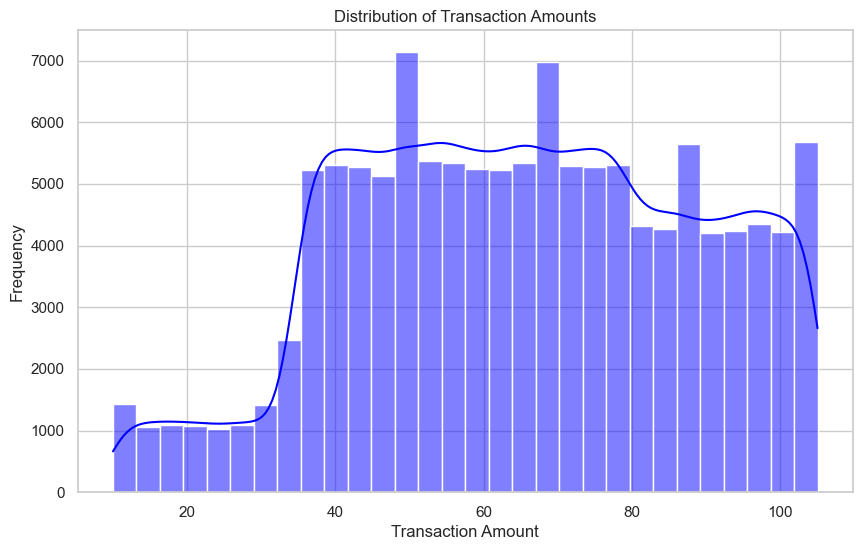

In [7]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data['tran_amount'], bins=30, kde=True, color='blue')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

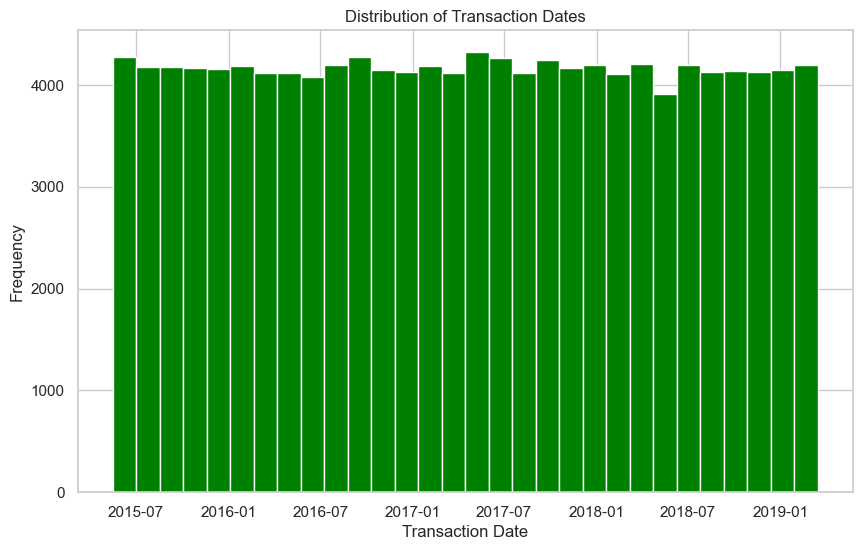

In [8]:
plt.figure(figsize=(10, 6))
data['trans_date'].hist(bins=30, color='green')
plt.title('Distribution of Transaction Dates')
plt.xlabel('Transaction Date')
plt.ylabel('Frequency')
plt.show()

In [9]:
data['trans_date'] = pd.to_datetime(data['trans_date'], format='%d-%b-%y')

In [16]:
import pandas as pd
snapshot_date = data['trans_date'].max() + pd.Timedelta(days=1)
rfm_table = data.groupby('customer_id').agg({
    'trans_date': lambda x: (snapshot_date - x.max()).days,
    'tran_amount': ['count', 'sum']
}).reset_index()

rfm_table.columns = ['customer_id', 'Recency', 'Frequency', 'Monetary']

print(rfm_table.head())


  customer_id  Recency  Frequency  Monetary
0      CS1112       62         15      1012
1      CS1113       36         20      1490
2      CS1114       33         19      1432
3      CS1115       12         22      1659
4      CS1116      204         13       857


In [17]:
rfm_table['R_Score'] = pd.qcut(rfm_table['Recency'], 4, labels=[4, 3, 2, 1])
rfm_table['F_Score'] = pd.qcut(rfm_table['Frequency'], 4, labels=[1, 2, 3, 4])
rfm_table['M_Score'] = pd.qcut(rfm_table['Monetary'], 4, labels=[1, 2, 3, 4])

rfm_table['RFM_Score'] = rfm_table.R_Score.astype(str) + rfm_table.F_Score.astype(str) + rfm_table.M_Score.astype(str)

rfm_table.head()


,customer_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,CS1112,62,15,1012,2,2,2,222
1,CS1113,36,20,1490,3,3,3,333
2,CS1114,33,19,1432,3,3,3,333
3,CS1115,12,22,1659,4,3,4,434
4,CS1116,204,13,857,1,1,2,112


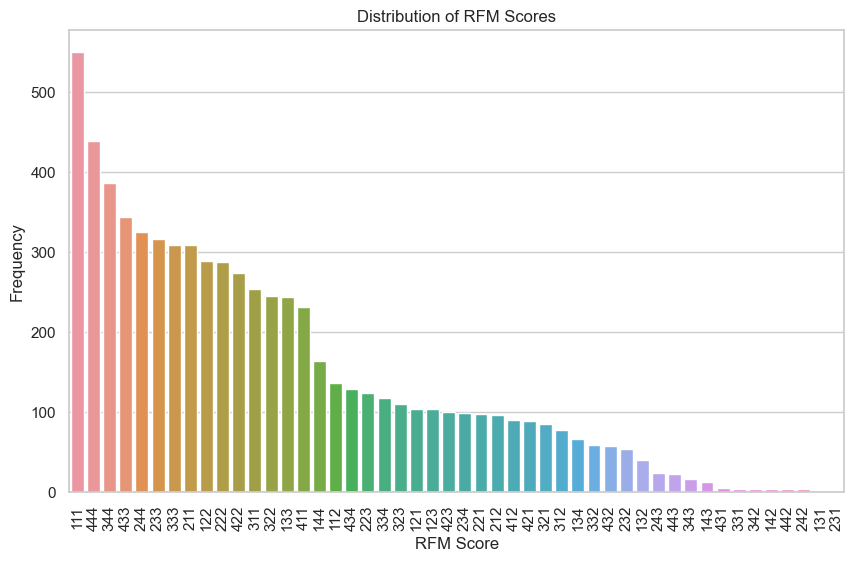

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.countplot(x='RFM_Score', data=rfm_table, order=rfm_table['RFM_Score'].value_counts().index)
plt.title('Distribution of RFM Scores')
plt.xlabel('RFM Score')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


In [ ]:
finished